In [46]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*- #

# ------------------------------------------------------------------------------
#
#   Copyright (C) 2022 Concordia NAVlab. All rights reserved.
#
#   @Filename: draw_depth_estimation_res.py
#
#   @Author: Shun Li
#
#   @Date: 2022-01-13
#
#   @Email: 2015097272@qq.com
#
#   @Description:
#
# ------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import MultipleLocator

In [47]:
data_set_path = "/home/ls/m300_depth_filter/m300_depth_data/m300_grabbed_data_1_41.2"
depth_whole = pd.read_csv(data_set_path+"/depth_estimation.csv")
depth_whole

,index,x,y,z,Unnamed: 4
0,76,3.799919,-1.133843,47.270969,NaN
1,76,3.403628,-0.874850,40.417767,NaN
2,76,3.246393,-0.772949,38.999603,NaN
3,76,3.732906,-0.792462,42.373611,NaN
4,76,3.825287,-0.832036,47.594433,NaN
...,...,...,...,...,...
2419,243,3.505957,-0.587538,39.428043,NaN
2420,243,3.477168,-0.718928,39.417145,NaN
2421,244,3.224893,-0.741672,39.314571,NaN
2422,244,3.715925,-0.512518,39.940670,NaN


In [48]:
x = depth_whole["x"].to_numpy()
y = depth_whole["y"].to_numpy()
z = depth_whole["z"].to_numpy()
index = depth_whole["index"].to_numpy()

# cond = z < 40
# x = x[cond]
# y = y[cond]
# z = z[cond]
# index = index[cond]


In [49]:
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 12,
}

In [50]:
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

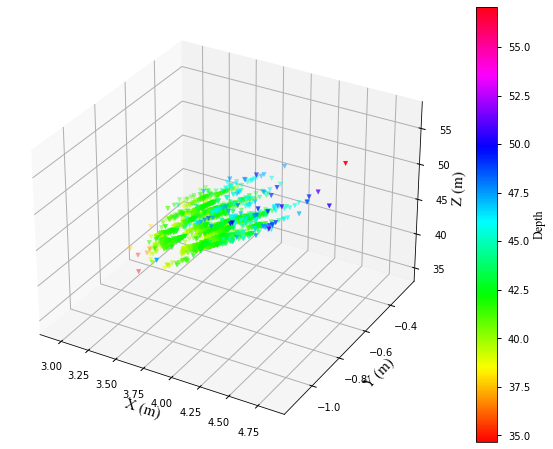

In [51]:
style.use('seaborn-notebook')

fig = plt.figure(figsize=[12,8])
ax = fig.gca(projection='3d')

p2 = ax.scatter3D(x, y, z, marker = "v", c=z, cmap="hsv")

ax.set_xlabel('X (m)', font=font1) # 画出坐标轴
ax.set_ylabel('Y (m)', font=font1)
ax.set_zlabel('Z (m)', font=font1)
cb = fig.colorbar(p2)
cb.set_label(label="Depth", font=font2)
fig.savefig(data_set_path+'/3d_points.pdf')

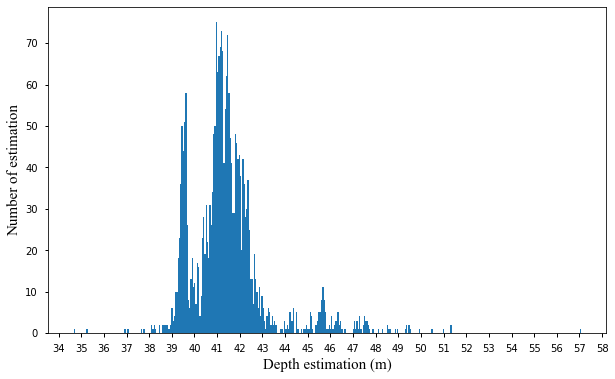

In [52]:
fig = plt.figure(figsize=[10,6])
ax = fig.gca()
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(10)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
# plt.xlim(6,33)

n, bins_limits, patches = plt.hist(z, bins=400)

plt.xlabel('Depth estimation (m)', font1)  
plt.ylabel('Number of estimation', font1)  
# plt.grid()
# plt.legend(prop=font2)
plt.show()
fig.savefig(data_set_path+'/hist_points.pdf')

In [53]:
# find the mid value
sort_z = np.sort(z)
mid = sort_z[int(sort_z.size/2)]
mid

41.260681152

In [54]:
max_index = np.argmax(n)
max_index

112

In [55]:
print(bins_limits[max_index])

40.93876678444


In [56]:
abs(mid - 41.2)/mid *100

0.14706774174776885